In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X= dataset[['Age' , 'EstimatedSalary' ]].values
y = dataset.iloc[:, -1].values

In [3]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#print(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]


In [6]:
from sklearn.metrics import (accuracy_score,confusion_matrix)
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.9125
[[55  3]
 [ 4 18]]


In [9]:
pip install empiricaldist


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install statadict

In [11]:
import empiricaldist
from statadict import parse_stata_dict

In [14]:
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [24]:
stata_dict = parse_stata_dict(dict_file)

In [19]:
import gzip
fp = gzip.open(data_file)

In [20]:
import pandas as pd
gss = pd.read_fwf(fp , names = stata_dict.names , colspecs = stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0  1972    1   23    16       2       1      0  18951.0
1  1972    2   70    10       1       1      0  24366.0
2  1972    3   48    12       2       1      0  24366.0
3  1972    4   27    17       2       1      0  30458.0
4  1972    5   61    12       2       1      0  50763.0


In [21]:
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [22]:
import numpy as np
educ = gss['EDUC'].replace([98,99], np.nan)

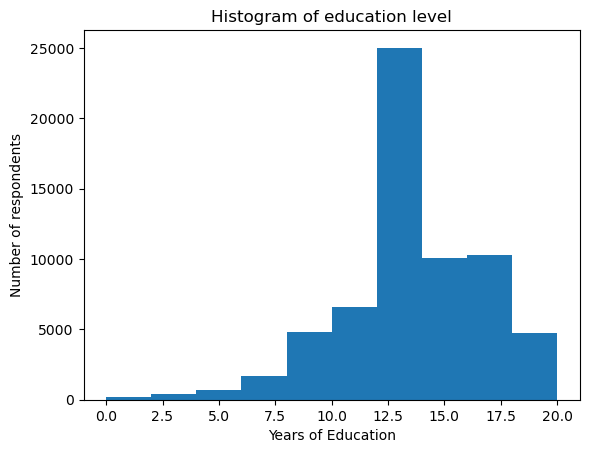

In [23]:
educ.hist(grid = False )
plt.xlabel('Years of Education')
plt.ylabel('Number of respondents')
plt.title('Histogram of education level');
plt.show()

In [26]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ , normalize = False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: count, dtype: int64
1439


In [27]:
pmf_educ_norm= Pmf.from_seq(educ , normalize = True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12])

EDUC
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: proportion, dtype: float64
0.30420656899299164


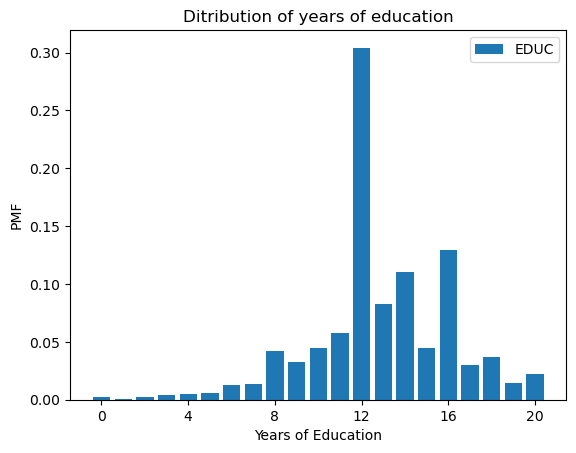

In [30]:
pmf_educ_norm.bar(label = 'EDUC')
plt.xlabel('Years of Education')
plt.xticks(range(0, 21 , 4))
plt.ylabel('PMF')
plt.title('Ditribution of years of education')
plt.legend();
plt.show()

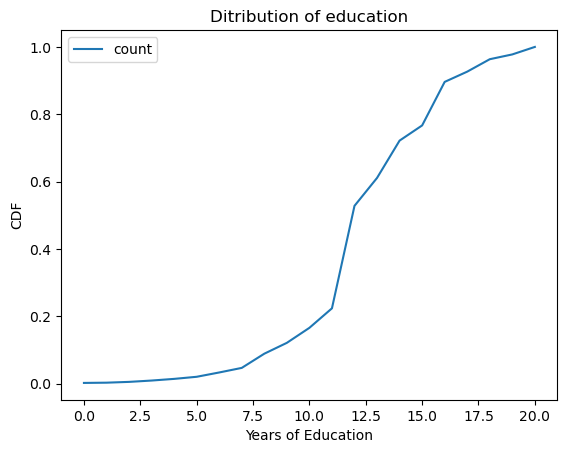

In [32]:
from empiricaldist import Cdf
educ = gss['EDUC'].replace([98,99], np.nan)
cdf_educ = Cdf.from_seq(educ)
cdf_educ.plot()
plt.xlabel('Years of Education')
plt.ylabel('CDF')
plt.title('Ditribution of education')
plt.legend();
plt.show()

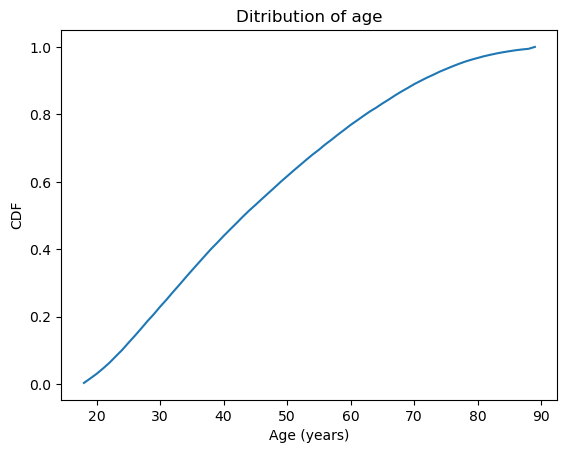

In [36]:
age = gss['AGE'].replace([98,99], np.nan)
cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age (years)')
plt.ylabel('CDF')
plt.title('Ditribution of age')
plt.show()

In [37]:
q = 51
p = cdf_age(q)
print(p)

0.6331867587402843


In [38]:
p1 = 0.25
q1 = cdf_age.inverse(p1)
print(q1)

31.0


In [40]:
p3 = 0.75
q3 = cdf_age.inverse(p3)
print(q3)
print(q3 - q1)

59.0
28.0


Q1: 31.0, Q3: 59.0


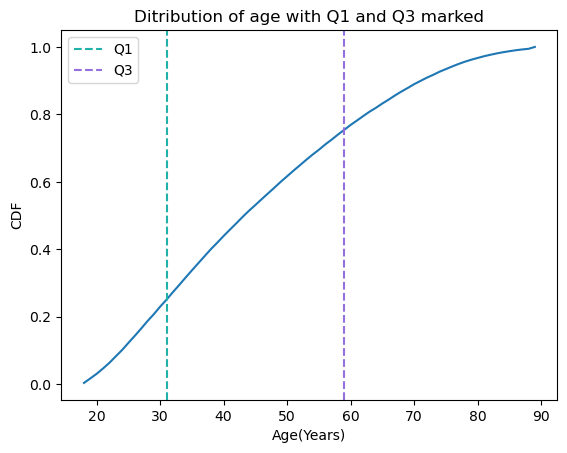

In [43]:
print(f"Q1: {q1}, Q3: {q3}")
cdf_age = empiricaldist.Cdf.from_seq(age)
cdf_values = cdf_age.values
data_points = cdf_age.index
plt.plot(data_points , cdf_values)
plt.axvline(x=q1 , color = 'lightseagreen' , linestyle = '--' , label='Q1' )
plt.axvline(x=q3 , color = 'mediumpurple' , linestyle = '--' , label='Q3' )
plt.xlabel('Age(Years)')
plt.ylabel('CDF')
plt.title('Ditribution of age with Q1 and Q3 marked')
plt.legend()
plt.show()

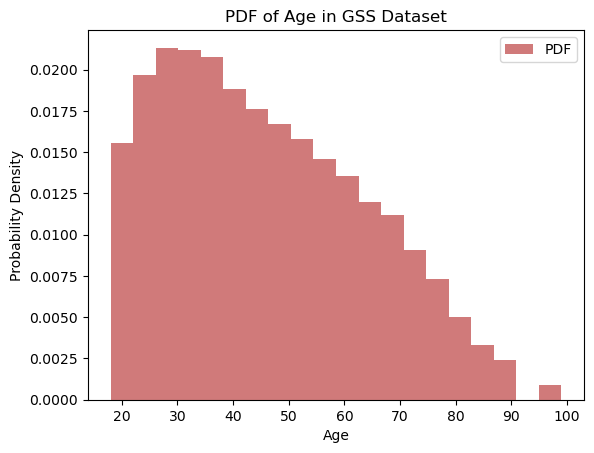

In [53]:
age_data = gss['AGE']
plt.hist(age_data , bins = 20 , density=True , alpha = 0.6 , color = 'firebrick' , label ='PDF')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('PDF of Age in GSS Dataset')
plt.legend()
plt.show()